In [1]:
%matplotlib inline
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import sympy as smpy

In [2]:
# create a class of points 
class Point:
  def __init__(self, index):
    self.index = index
    self.r = None
    self.theta = None
    self.image_1_path = None
    self.image_2_path = None
    self.image_3_path = None
    self.image_4_path = None
    self.image_5_path = None
    self.image_6_path = None
    self.image_7_path = None
    self.image_8_path = None

    # actual y values 
    self.actualy = None

    # the positions to the x values
    self.i1x = None
    self.i2x = None
    self.i3x = None
    self.i4x = None
    self.i5x = None
    self.i6x = None
    self.i7x = None
    self.i8x = None
    # the positon to the y values
    self.i1y = None
    self.i2y = None
    self.i3y = None
    self.i4y = None
    self.i5y = None
    self.i6y = None
    self.i7y = None
    self.i8y = None
    # the the weights
    self.i1w = None
    self.i2w = None
    self.i3w = None
    self.i4w = None
    self.i5w = None
    self.i6w = None
    self.i7w = None
    self.i8w = None

    # equations 
    self.eqn1 = None
    self.eqn2 = None
    self.eqn3 = None
    self.eqn4 = None
    self.eqn5 = None
    self.eqn6 = None
    self.eqn7 = None
    self.eqn8 = None
  
  def printVals(self):
    print(f"the x values are: {self.i1x}, {self.i2x}, {self.i3x}, {self.i4x}, {self.i5x}, {self.i6x}, y values are: {self.i1y}, {self.i2x}, {self.i3y}, {self.i4y}, {self.i5y}, {self.i6y}, the weights are: {self.i1w}, {self.i2w}, {self.i3w}, {self.i4w}, {self.i5w}, {self.i6w}")

  def averageYs(self):
    y_s = [self.i1y*self.i1w, self.i2y*self.i2w, self.i3y*self.i3w, self.i4y*self.i4w, self.i5y*self.i5w, self.i6y*self.i6w, self.i7y*self.i7w, self.i8y*self.i8w]
    weights = [self.i1w, self.i2w, self.i3w, self.i4w, self.i5w, self.i6w, self.i7w]
    average = sum(y_s)/sum(weights)
    return average

  def averageXs(self):
    x_s = [self.i1x*self.i1w, self.i2x*self.i2w, self.i3x*self.i3w, self.i4x*self.i4w, self.i5x*self.i5w, self.i6x*self.i6w, self.i7x*self.i7w, self.i8x*self.i8w]
    weights = [self.i1w, self.i2w, self.i3w, self.i4w, self.i5w, self.i6w, self.i7w]
    average = sum(x_s)/sum(weights)
    return average


In [3]:
Points = []
# cause there are 500 points 
for x in range(500):
    Points.append(Point(x))

255.0


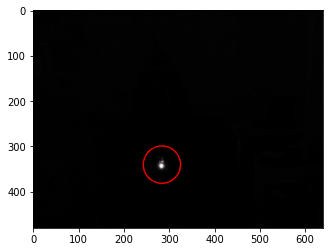

In [47]:
blurAmount = 41
filepath = r"D:\\CloudStorage\\OneDrive - Harvard University\\GSD 6338 TA\\Christmastree\\datset_py\\45_deg\\79_45.png"

image = cv2.imread(filepath)
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (blurAmount, blurAmount), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
image = orig.copy()
cv2.circle(image, maxLoc, 41, (255, 0, 0), 2)
plt.imshow(image)
print(maxVal)

In [48]:
# detect an image's brigtest point given fp 
def imageBP(fp):
    image = cv2.imread(fp)
    orig = image.copy()
    gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
    # gray = cv2.GaussianBlur(gray, (blurAmount, blurAmount), 0)
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)
    return minVal, maxVal, minLoc, maxLoc

In [6]:
# create a list of images that we shall be processing 
# pat for the images 
path = r"D:\\CloudStorage\\OneDrive - Harvard University\\GSD 6338 TA\\Christmastree\\datset_py\\"

for pnt_index in range(len(Points)):
    # paths to each of the images 
    Points[pnt_index].image_1_path = path + r"0_deg\\" + f"{pnt_index}_N.png"
    Points[pnt_index].image_2_path = path + r"45_deg\\" + f"{pnt_index}_45.png"
    Points[pnt_index].image_3_path = path + r"90_deg\\" + f"{pnt_index}_90.png"
    Points[pnt_index].image_4_path = path + r"135_deg\\" + f"{pnt_index}_135.png"
    Points[pnt_index].image_5_path = path + r"180_deg\\" + f"{pnt_index}_180.png"
    Points[pnt_index].image_6_path = path + r"225_deg\\" + f"{pnt_index}_225.png"
    Points[pnt_index].image_7_path = path + r"270_deg\\" + f"{pnt_index}_270.png"
    Points[pnt_index].image_8_path = path + r"315_deg\\" + f"{pnt_index}_315.png"
    

In [7]:
examplePath = r"D:\\CloudStorage\\OneDrive - Harvard University\\GSD 6338 TA\\Christmastree\\datset_py\\315_deg\\0_315.png"
imageBP(examplePath)

(0.0, 80.0, (306, 98), (394, 379))

In [8]:
examplePath2 = Points[100].image_8_path
imageBP(examplePath2)

(0.0, 10.0, (321, 164), (297, 295))

In [9]:
# find the brightest point
for pnt_index in range(len(Points)):
    pnt = Points[pnt_index]

    minVal_1, maxVal_1, minLoc_1, (maxLoc_1_x, maxLoc_1_y) = imageBP(pnt.image_1_path)
    minVal_2, maxVal_2, minLoc_2, (maxLoc_2_x, maxLoc_2_y) = imageBP(pnt.image_2_path)
    minVal_3, maxVal_3, minLoc_3, (maxLoc_3_x, maxLoc_3_y) = imageBP(pnt.image_3_path)
    minVal_4, maxVal_4, minLoc_4, (maxLoc_4_x, maxLoc_4_y) = imageBP(pnt.image_4_path)
    minVal_5, maxVal_5, minLoc_5, (maxLoc_5_x, maxLoc_5_y) = imageBP(pnt.image_5_path)
    minVal_6, maxVal_6, minLoc_6, (maxLoc_6_x, maxLoc_6_y) = imageBP(pnt.image_6_path)
    minVal_7, maxVal_7, minLoc_7, (maxLoc_7_x, maxLoc_7_y) = imageBP(pnt.image_7_path)
    minVal_8, maxVal_8, minLoc_8, (maxLoc_8_x, maxLoc_8_y) = imageBP(pnt.image_8_path)

    # value of the the x values 
    pnt.i1x = maxLoc_1_x
    pnt.i2x = maxLoc_2_x
    pnt.i3x = maxLoc_3_x
    pnt.i4x = maxLoc_4_x
    pnt.i5x = maxLoc_5_x
    pnt.i6x = maxLoc_6_x
    pnt.i7x = maxLoc_7_x
    pnt.i8x = maxLoc_8_x

    # the y values 
    pnt.i1y = maxLoc_1_y
    pnt.i2y = maxLoc_2_y
    pnt.i3y = maxLoc_3_y
    pnt.i4y = maxLoc_4_y
    pnt.i5y = maxLoc_5_y
    pnt.i6y = maxLoc_6_y
    pnt.i7y = maxLoc_7_y
    pnt.i8y = maxLoc_8_y

    # the the weights
    pnt.i1w = maxVal_1
    pnt.i2w = maxVal_2
    pnt.i3w = maxVal_3
    pnt.i4w = maxVal_4
    pnt.i5w = maxVal_5
    pnt.i6w = maxVal_6
    pnt.i7w = maxVal_7
    pnt.i8w = maxVal_8

<AxesSubplot:>

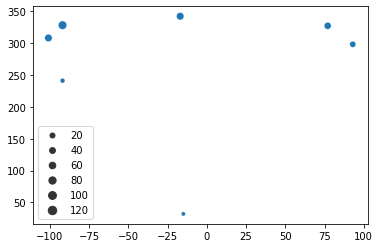

In [42]:
# for some random points plot the x and y values 
sel_index = 79
point = Points[sel_index]
x_pos = []
y_pos = []
# make another one which holds the sizes of the weights
sizes = []

x_pos.append(point.i1x)
x_pos.append(point.i2x)
x_pos.append(point.i3x)
x_pos.append(point.i4x)
x_pos.append(point.i5x)
x_pos.append(point.i6x)
x_pos.append(point.i7x)
x_pos.append(point.i8x)

y_pos.append(point.i1y)
y_pos.append(point.i2y)
y_pos.append(point.i3y)
y_pos.append(point.i4y)
y_pos.append(point.i5y)
y_pos.append(point.i6y)
y_pos.append(point.i7y)
y_pos.append(point.i8y)

sizes.append(point.i1w)
sizes.append(point.i2w)
sizes.append(point.i3w)
sizes.append(point.i4w)
sizes.append(point.i5w)
sizes.append(point.i6w)
sizes.append(point.i7w)
sizes.append(point.i8w)

sns.scatterplot(x=x_pos, y=y_pos, size=sizes)


In [11]:
# find the the average Ys
for pnt in Points:
    pnt.actualy = pnt.averageYs()

In [12]:
average_xs = []
for pnt in Points:
    average_xs.append(pnt.averageXs())

average_xs = sum(average_xs)/(len(average_xs)*8)
print(average_xs)

43.312885248842235


In [13]:
# manually change the center to be something else
average_xs = 300

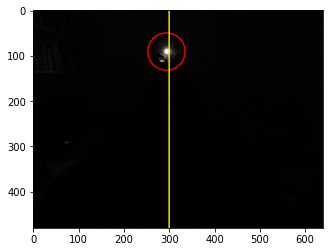

In [14]:
# sanity check if the center of x is in the image??
orig = image.copy()
x1, y1 = int(average_xs), 0
x2, y2 = int(average_xs), 480
cv2.line(orig , (x1, y1), (x2, y2), (255, 255, 0), thickness=2)
plt.imshow(orig )

In [15]:
# adjust all the x values 
for pnt in Points:

    pnt.i1x = pnt.i1x - average_xs
    pnt.i2x = pnt.i2x - average_xs
    pnt.i3x = pnt.i3x - average_xs
    pnt.i4x = pnt.i4x - average_xs
    pnt.i5x = pnt.i5x - average_xs
    pnt.i6x = pnt.i6x - average_xs
    pnt.i7x = pnt.i7x - average_xs
    pnt.i8x = pnt.i8x - average_xs

<AxesSubplot:>

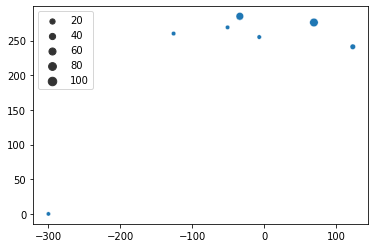

In [16]:
# sanity check the plot again
# for some random points plot the x and y values 
sel_index = 300
point = Points[sel_index]
x_pos = []
y_pos = []
# make another one which holds the sizes of the weights
sizes = []

x_pos.append(point.i1x)
x_pos.append(point.i2x)
x_pos.append(point.i3x)
x_pos.append(point.i4x)
x_pos.append(point.i5x)
x_pos.append(point.i6x)
x_pos.append(point.i7x)
x_pos.append(point.i8x)

y_pos.append(point.i1y)
y_pos.append(point.i2y)
y_pos.append(point.i3y)
y_pos.append(point.i4y)
y_pos.append(point.i5y)
y_pos.append(point.i6y)
y_pos.append(point.i7y)
y_pos.append(point.i8y)

sizes.append(point.i1w)
sizes.append(point.i2w)
sizes.append(point.i3w)
sizes.append(point.i4w)
sizes.append(point.i5w)
sizes.append(point.i6w)
sizes.append(point.i7w)
sizes.append(point.i8w)

sns.scatterplot(x=x_pos, y=y_pos, size=sizes)

<AxesSubplot:>

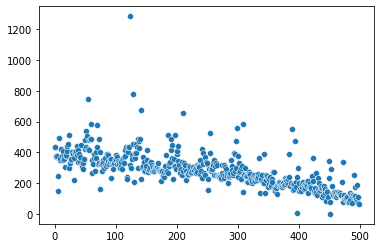

In [17]:
# plot the y's (this should look like the increasing plot)
ypos = []

for point in Points:
    ypos.append(point.actualy)

sns.scatterplot(x=list(range(500)),y=ypos )

In [18]:
# looks like there is way too much noise on the Y's at the end 


In [19]:
x_list = []
for pnt in Points:
    x_list.append(pnt.i1x)
    x_list.append(pnt.i2x)
    x_list.append(pnt.i3x)
    x_list.append(pnt.i4x)
    x_list.append(pnt.i5x)
    x_list.append(pnt.i6x)
    x_list.append(pnt.i7x)
    x_list.append(pnt.i8x)

# get the minimum and maximum value 
print(min(x_list), max(x_list))

-300 339


In [20]:
def combinations_of_2(l):
    for i, j in zip(*np.triu_indices(len(l), 1)):
        yield l[i], l[j]

In [32]:
# set all the x equations so that we can end up solving them
for pnt in Points:

    r, theta = smpy.symbols('r theta')
    pnt.eqn1 = smpy.Eq(r * smpy.cos(theta), pnt.i1x)
    pnt.eqn2 = smpy.Eq(r * smpy.cos(theta + smpy.pi/4), pnt.i2x)
    pnt.eqn3 = smpy.Eq(r * smpy.cos(theta + smpy.pi/2), pnt.i3x)
    pnt.eqn4 = smpy.Eq(r * smpy.cos(theta + (3*smpy.pi)/4), pnt.i4x)
    pnt.eqn5 = smpy.Eq(r * smpy.cos(theta + smpy.pi), pnt.i5x)
    pnt.eqn6 = smpy.Eq(r * smpy.cos(theta + (5*smpy.pi)/4), pnt.i6x)
    pnt.eqn7 = smpy.Eq(r * smpy.cos(theta + (3*smpy.pi)/2), pnt.i7x)
    pnt.eqn8 = smpy.Eq(r * smpy.cos(theta + (7*smpy.pi)/4), pnt.i8x)

    #then generate n choose 2 combinations from these
    # best way is to list them out explicity 
    equns  = [pnt.eqn1, pnt.eqn2, pnt.eqn3, pnt.eqn4, pnt.eqn5, pnt.eqn6, pnt.eqn7, pnt.eqn8]
    weights = [pnt.i1w, pnt.i2w, pnt.i3w, pnt.i4w, pnt.i5w, pnt.i6w, pnt.i7w, pnt.i8w]

    # generate permutations using the custom n choose 2 
    equn_permutations = list(combinations_of_2(equns))
    weights_permutations = list(combinations_of_2(weights))

    r_s = []
    thetas = []
    w_s = []

    # generate a list of solutions 
    for eqn_perm, w in zip(equn_permutations, weights_permutations):
        e1, e2 = eqn_perm
        w1, w2 = w

        # calculate the solution
        try:
            result = smpy.nsolve([e1,e2],(r,theta), (400, 0))
            calculated_r = result[0]
            calculated_theta = result[1]
            calculated_w = w1*w2

            r_s.append(calculated_r)
            thetas.append(calculated_theta)
            w_s.append(calculated_w)
        except Exception as e:
            print(e)
    
    # for all these solutions generate a single answer by calculating the weighted averages 
    r_s_running_sum = 0
    thetas_running_sum = 0
    w_s_running_sum = 0

    for rval, thetaval, wval in zip(r_s, thetas, w_s):
        r_s_running_sum += rval * wval * wval
        thetas_running_sum += thetaval * wval * wval
        w_s_running_sum += wval * wval

    # finall set the points r and theta value
    pnt.r = r_s_running_sum/(w_s_running_sum + 0.000000001)
    pnt.theta = thetas_running_sum/(w_s_running_sum + 0.000000001)


    # sns.scatterplot(x=r_s, y=thetas, size=w_s)
    # sns.scatterplot(x=[pnt.r], y=[pnt.theta], marker='o')
    # break
    
    print("Done with one point!")

matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one point!
matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one point!
matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one point!
matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one point!
matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one point!
matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one point!
matrix is numerically singular
matrix is numerically singular
'>=' not supported between instances of 'NoneType' and 'int'
Done with one

In [33]:
# finally save all the points out as a csv. 
# here we want a specific datastructure - the x value, the y value, the z value, r and theta
Data = {"index":[], "x":[], "y":[], "z": [], "r":[], "theta":[]}

for i in range(len(Points)):
    pnt = Points[i]
    Data["index"].append(i)
    Data["x"].append(pnt.r * math.cos(pnt.theta))
    Data["y"].append(pnt.r * math.sin(pnt.theta))
    Data["z"].append(pnt.actualy)
    Data["r"].append(pnt.r)
    Data["theta"].append(pnt.theta)

# now make this a dataframe 
df = pd.DataFrame.from_dict(Data)
df.to_csv("coordinates.csv", index=False)

In [34]:
with open('coords_mattForm_raw.txt', 'w') as f:
    for pnt in Points:
        line = f"[{pnt.r * math.cos(pnt.theta)}, {pnt.r * math.sin(pnt.theta)}, {pnt.actualy}] \n"
        f.write(line)